#### Mixture distribution model

In [23]:
import pymc3 as pm
import arviz as az
import theano
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from operator import mul

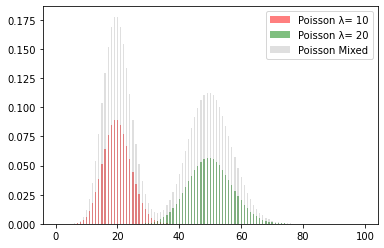

In [45]:
def poisson(lambda_, k):
    k = int(k)
    result = (lambda_**k) * (math.exp(-lambda_))  / math.factorial(k)
    return result

x =  np.arange(1, 100, 1)
y1= [poisson(20,i) for i in x]
y2= [poisson(50,i) for i in x]
y =  [x*2 + y*2 for (x, y) in zip(y1, y2)]

plt.bar(x, y1, align="center", width=0.4, color="red",alpha=0.5, label="Poisson λ= %d" % 10)

plt.bar(x, y2, align="center", width=0.4, color="green",alpha=0.5, label="Poisson λ= %d" % 20)

plt.bar(x, y, align="center", width=0.4, color="gray",alpha=0.25, label="Poisson Mixed")


plt.legend()
plt.show()

In [54]:
df_1 = pd.read_csv("test_data_1.csv")
df_2 = pd.read_csv("test_data_1.csv")
x = df_1['P'].values
fig = plt.figure(figsize=(8, 3))
ax = fig.subplots(1,1)
sns.distplot(x, bins=50, ax=ax)

In [46]:
# 2-Mixture Poisson using iterable of distributions.
with pm.Model() as model:
    n_sample = 101    
    
    alpha1 = pm.Uniform('alpha1', lower=0, upper=100)
    alpha2 = pm.Uniform('alpha2', lower=0, upper=100)
    beta1 = pm.Uniform('beta1', lower=0, upper=100)
    beta2 = pm.Uniform('beta2', lower=0, upper=100)
    
    lam1 = pm.Gamma('lam1',alpha=alpha1, beta=beta1)
    lam2 = pm.Gamma('lam2',alpha=alpha2, beta=beta2)
    
    pois1 = pm.Poisson.dist(mu=lam1)
    pois2 = pm.Poisson.dist(mu=lam2)

    pi = pm.Dirichlet('pi', a=np.array([1, 1]))

    fx = pm.Mixture('fx', w=pi, comp_dists = [pois1, pois2], observed=y) #x

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [47]:
with model:
    trace_n = pm.sample(10000, chains=5, cores=1)

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\pymc3\sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (5 chains in 1 job)
NUTS: [pi, lam2, lam1, beta2, beta1, alpha2, alpha1]


c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 8500 seconds.
There were 2322 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6881902895276603, but should be close to 0.8. Try to increase the number of tuning steps.
There were 7592 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3239349788399878, but should be close to 0.8. Try to increase the number of tuning steps.
There were 9041 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12847 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5070202142828006, but should be close to 0.8. Try to increase the number of tuning steps.
There were 17273 divergences after tuning. Increase `target_accept` or reparameterize.
The 

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


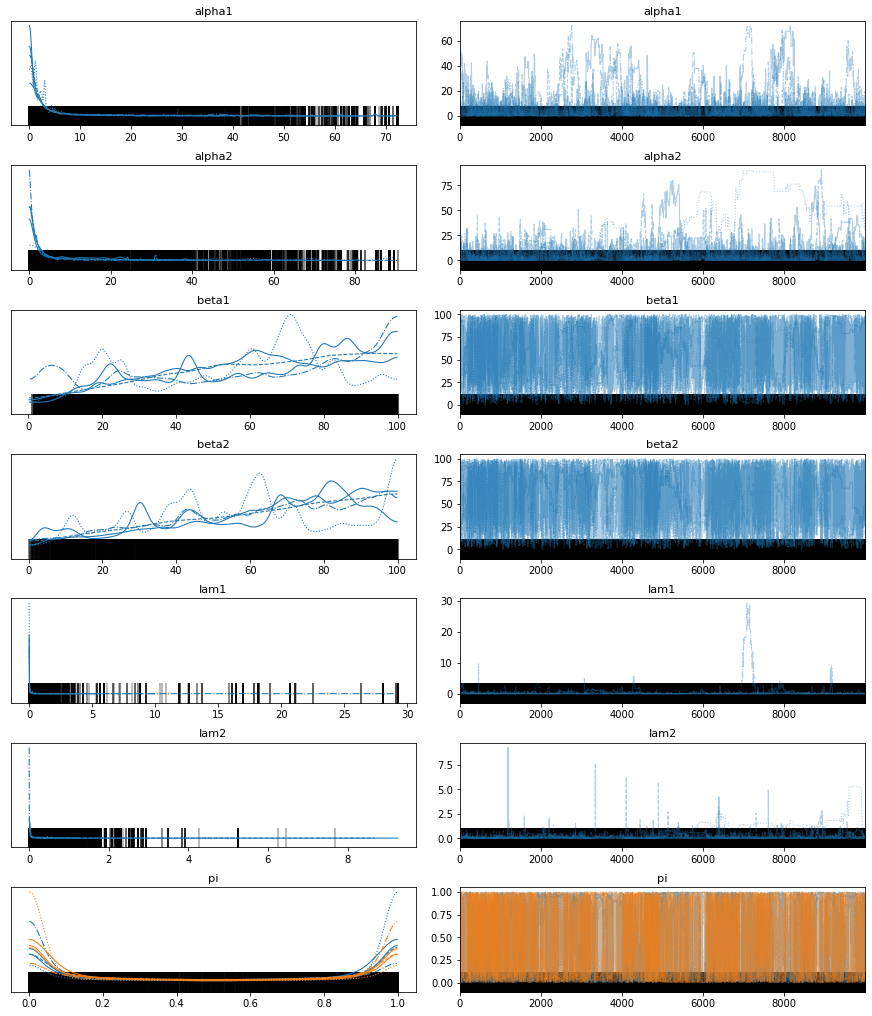

In [48]:
az.plot_trace(trace_n, var_names=['alpha1','alpha2','beta1','beta2','lam1','lam2','pi']);

In [49]:
az.rhat(trace_n)

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<xarray.Dataset>
Dimensions:   (pi_dim_0: 2)
Coordinates:
  * pi_dim_0  (pi_dim_0) int32 0 1
Data variables:
    alpha1    float64 1.032
    alpha2    float64 1.2
    beta1     float64 1.016
    beta2     float64 1.032
    lam1      float64 1.052
    lam2      float64 1.213
    pi        (pi_dim_0) float64 1.112 1.112

array([[<AxesSubplot:title={'center':'alpha1'}>,
        <AxesSubplot:title={'center':'alpha2'}>,
        <AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'lam1'}>,
        <AxesSubplot:title={'center':'lam2'}>,
        <AxesSubplot:title={'center':'pi\n0'}>,
        <AxesSubplot:title={'center':'pi\n1'}>]], dtype=object)

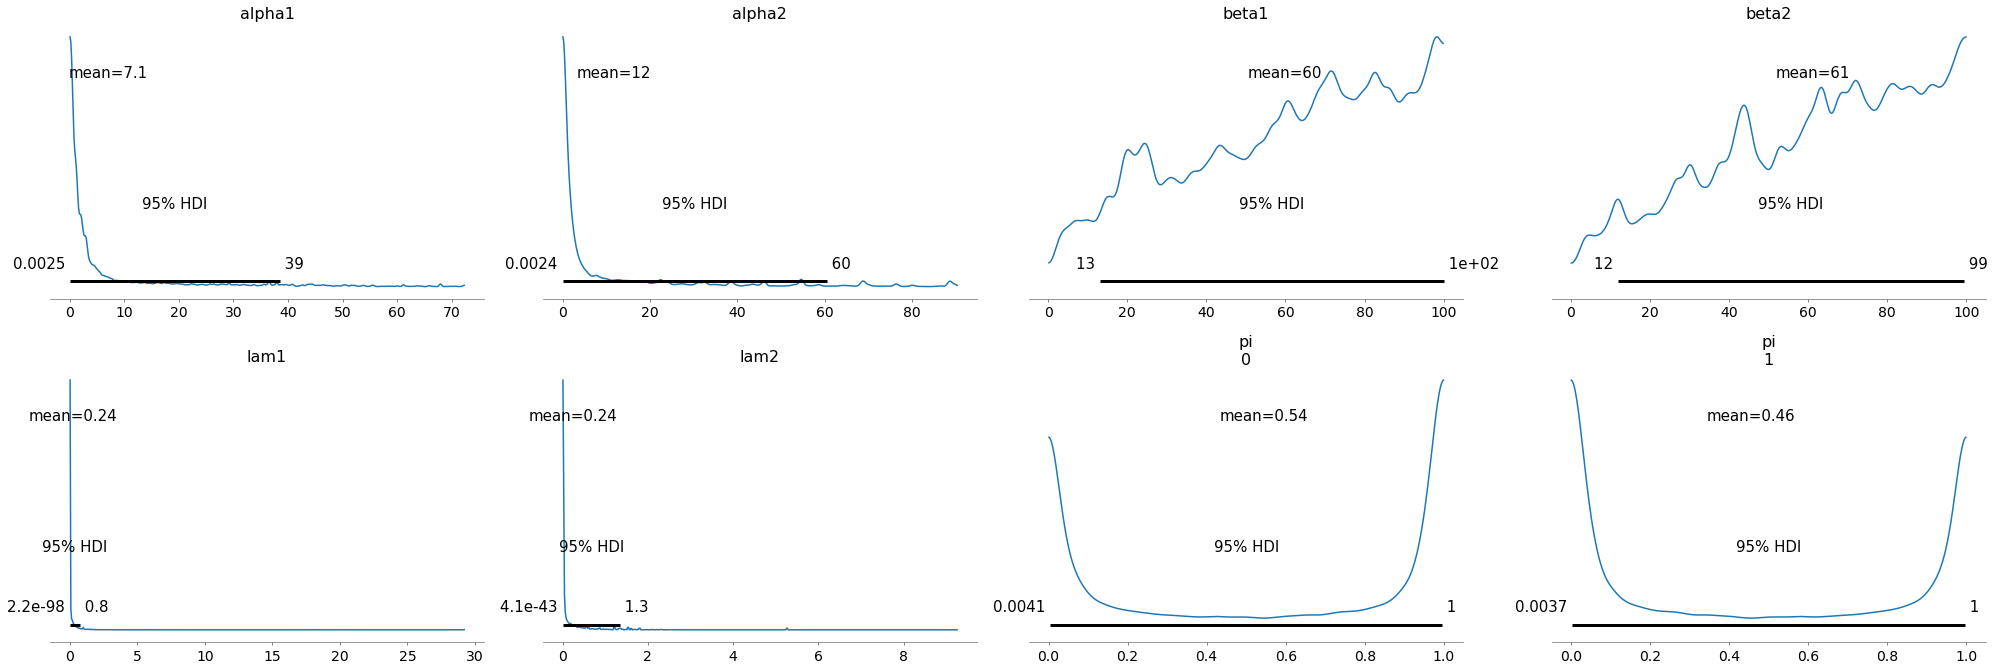

In [50]:
az.plot_posterior(trace_n, hdi_prob=0.95)

In [53]:
# 2-Mixture Poisson using iterable of distributions.
with pm.Model() as model:
    n_sample = 101    

    lam1 = pm.Uniform('lam1', lower=0, upper=100)
    lam2 = pm.Uniform('lam2', lower=0, upper=100)
    
    pois1 = pm.Poisson.dist(mu=lam1)
    pois2 = pm.Poisson.dist(mu=lam2)

    pi = pm.Dirichlet('pi', a=np.array([1, 1]))

    fx = pm.Mixture('fx', w=pi, comp_dists = [pois1, pois2], observed=y) #x

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [54]:
with model:
    trace_n = pm.sample(5000, chains=5, cores=1)

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\pymc3\sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (5 chains in 1 job)
NUTS: [pi, lam2, lam1]


Sampling 5 chains for 1_000 tune and 5_000 draw iterations (5_000 + 25_000 draws total) took 1452 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6571741069799174, but should be close to 0.8. Try to increase the number of tuning steps.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.686987052371514, but should be close to 0.8. Try to increase the number of tuning steps.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9136780835015957, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated numb

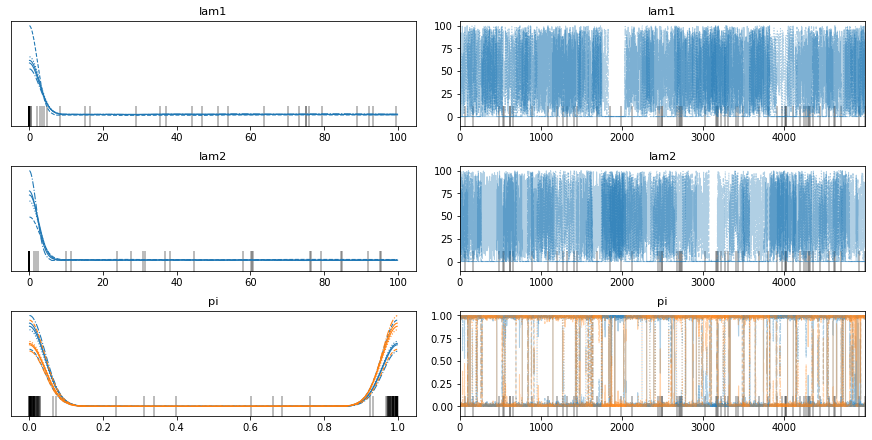

In [57]:
az.plot_trace(trace_n, var_names=['lam1','lam2','pi']);

In [58]:
az.rhat(trace_n)

c:\users\twopo\appdata\local\programs\python\python37\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<xarray.Dataset>
Dimensions:   (pi_dim_0: 2)
Coordinates:
  * pi_dim_0  (pi_dim_0) int32 0 1
Data variables:
    lam1      float64 1.03
    lam2      float64 1.03
    pi        (pi_dim_0) float64 1.029 1.029

In [ ]:
az.plot_posterior(trace_n, hdi_prob=0.95)